# **ETL (Extracción, transformación y carga)**

#### DISCLAIMER: 
Definir las preguntas disparadoras nos va a permitir filtrar las columnas que se van a utilizar para realizar ETL y EDA, y de esta manera no tener que trabajar con la totalidad de features del dataset al momento de analizarlo. Para nustro análisis nos vamos a focalizar en responder lo siguiente

-------------
- Cuáles son los roles mejor pagos en promedio? Esto cambió durante la pandemia (2020 a 2021)?

- En qué rol hay más cantidad de personas trabajando? Evolucionó durante covid?

- Hay diferencia de salario entre hombres y mujeres en la industria tech?

- Qué empresas tienen más empleados?

- Qué empresas pagan más? Existe diferencia de salario entre FAANG y otras empresas?

- Evaluar correlación: educación-salario, años de experiencia-salario, etnia-salario, dmaid

In [1]:
# Librerías básicas a importar
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salario_data.csv')
# Sin limites de visualización de columnas
pd.set_option('display.max_columns', None)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [3]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

**Eliminamos todas las filas duplicadas**

In [4]:
print(f"Dimensiones antes de eliminar duplicados: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Dimensiones después de eliminar duplicados: {df.shape}")


Dimensiones antes de eliminar duplicados: (62642, 29)
Dimensiones después de eliminar duplicados: (62642, 29)


**Información general de dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62519 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61772 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40134 non-null  object 
 14  cityid                

In [6]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [7]:
df['company'].value_counts()

company
Amazon                      8126
Microsoft                   5216
Google                      4330
Facebook                    2990
Apple                       2028
                            ... 
Samsung research America       1
Bny Mellon                     1
yelp                           1
Bloomberg lp                   1
tableau software               1
Name: count, Length: 1631, dtype: int64

**Una inspección rápida hace que me quede con las siguientes columnas para realizar mi análisis exploratorio**

In [90]:
df = df[["timestamp", 'company', "level", 'title', 'totalyearlycompensation','location',\
         'yearsofexperience', 'yearsatcompany','bonus', 'gender','Race',\
         'Education']]

df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,bonus,gender,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,10000.0,NaN,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,NaN,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,0.0,NaN,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,35000.0,NaN,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,NaN,NaN,NaN


**Entre las columnas elegidas no tenemos ninguna irrelevante ya que todas tienen mas de un nivel por categoría**

In [91]:
# Subniveles por columna
lista_columnas = list(df.columns)
for i, col in enumerate(lista_columnas):
    print(f"{col.upper()}: {df[col].nunique()} subniveles")

TIMESTAMP: 62561 subniveles
COMPANY: 1631 subniveles
LEVEL: 2922 subniveles
TITLE: 15 subniveles
TOTALYEARLYCOMPENSATION: 893 subniveles
LOCATION: 1050 subniveles
YEARSOFEXPERIENCE: 65 subniveles
YEARSATCOMPANY: 81 subniveles
BONUS: 335 subniveles
GENDER: 4 subniveles
RACE: 5 subniveles
EDUCATION: 5 subniveles


**Clasificamos las columnas en numéricas y categoricas y veamos su número de subcategorías**

In [92]:
cat_features = [column for column in df.columns if df[column].dtype=='O']
cat_features

['timestamp',
 'company',
 'level',
 'title',
 'location',
 'gender',
 'Race',
 'Education']

In [93]:
for feature in cat_features:
    print(f"La variable {feature.upper()} tiene categorias: {df[feature].nunique()}")

La variable TIMESTAMP tiene categorias: 62561
La variable COMPANY tiene categorias: 1631
La variable LEVEL tiene categorias: 2922
La variable TITLE tiene categorias: 15
La variable LOCATION tiene categorias: 1050
La variable GENDER tiene categorias: 4
La variable RACE tiene categorias: 5
La variable EDUCATION tiene categorias: 5


In [94]:
num_features = [column for column in df.columns if df[column].dtype!='O']
num_features

['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'bonus']

In [95]:
for feature in num_features:
    print(f"La variable {feature.upper()} tiene categorias: {df[feature].nunique()}")

La variable TOTALYEARLYCOMPENSATION tiene categorias: 893
La variable YEARSOFEXPERIENCE tiene categorias: 65
La variable YEARSATCOMPANY tiene categorias: 81
La variable BONUS tiene categorias: 335


*Observación: Todas las columnas tienen más de un a categoría por lo que ninguna es irrelevante*

**De las columnas categoricas elegimos las que menos categorias contienen para analisarlas más a detalle**

In [96]:
for feature in ['title', 'gender', 'Race', 'Education']:
    print(f"La variable {feature.upper()} tiene categorias: {df[feature].nunique()}\
    \n{df[feature].value_counts()}\
    \n \n------------------------\n")

La variable TITLE tiene categorias: 15    
title
Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: count, dtype: int64    
 
------------------------

La variable GENDER tiene categorias: 4    
gender
Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: count, dtype: int64    
 
------------------------

La variable RACE tiene categorias: 5    
Race
Asian

*Observación: La columna GENDER tiene un error en la categoría 'Title: Senior Software Engineer' ya que no puede haber un genero sexual con este título. Consideramos reemplazarlo por una etiqueta "desconocido"  en vez de eliminarlo ya que los datos asociados pueden ser de aporte para nuesto análisis*

In [97]:
df.gender = df.gender.replace({"Title: Senior Software Engineer":"Sin dato"})
df['gender'].value_counts()

gender
Male        35702
Female       6999
Other         400
Sin dato        1
Name: count, dtype: int64

## **Valores Núlos**

**Cantidad y Porcentaje de valores núlos por columna**

In [98]:
dic = {'cantidad':df.isna().sum().sort_values(ascending=False),
       'porcentaje':round(df.isna().mean().sort_values(ascending=False)*100,2)}
Valores_nulos_df = pd.DataFrame(dic)
Valores_nulos_df

,cantidad,porcentaje
Race,40215,64.20
Education,32272,51.52
gender,19540,31.19
level,123,0.20
company,5,0.01
timestamp,0,0.00
title,0,0.00
totalyearlycompensation,0,0.00
location,0,0.00
yearsofexperience,0,0.00


**Rellenamos con una etiqueta 'Desconocido' a los valores faltantes de los fetures categoricos**

In [99]:
df = df.fillna({'Race':'Desconocido', 'Education':'Desconocido', 'gender':'Desconocido'})
df.isnull().sum().sort_values(ascending=False)

level                      123
company                      5
timestamp                    0
title                        0
totalyearlycompensation      0
location                     0
yearsofexperience            0
yearsatcompany               0
bonus                        0
gender                       0
Race                         0
Education                    0
dtype: int64

**Revisamos el impacto de eliminar las instancias asociadas a los valores núlos de las columnas 'company' y 'level'**

In [100]:
df_filter_level = df[df['level'].isna()]
df_filter_level.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,bonus
count,123.000000,123.000000,123.000000,123.000000
mean,177528.455285,6.276423,1.849593,27609.756098
std,115377.806003,5.248420,2.361695,69920.872625
min,36000.000000,0.000000,0.000000,0.000000
25%,116000.000000,3.000000,0.000000,0.000000
50%,145000.000000,5.000000,1.000000,10000.000000
75%,200000.000000,8.000000,2.000000,20000.000000
max,750000.000000,25.000000,19.000000,520000.000000


In [101]:
df_filter_company = df[df['company'].isna()]
df_filter_company.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,bonus
count,5.000000,5.000000,5.000000,5.000000
mean,118200.000000,5.400000,1.600000,10000.000000
std,100656.346049,5.504544,1.516575,18220.867158
min,47000.000000,2.000000,0.000000,0.000000
25%,54000.000000,2.000000,1.000000,0.000000
50%,85000.000000,3.000000,1.000000,0.000000
75%,113000.000000,5.000000,2.000000,8000.000000
max,292000.000000,15.000000,4.000000,42000.000000


In [102]:
df['totalyearlycompensation'].max()

4980000

*Observación: vemos que no el orden máximo de la compensacion es de millones y las cantidades asociadas a los valores nulos es del orden de miles porlo que consideramos eliminarlas*

In [103]:
df.dropna(subset=['company', 'level'], inplace=True)
df.isnull().mean().sort_values(ascending=False)

timestamp                  0.0
company                    0.0
level                      0.0
title                      0.0
totalyearlycompensation    0.0
location                   0.0
yearsofexperience          0.0
yearsatcompany             0.0
bonus                      0.0
gender                     0.0
Race                       0.0
Education                  0.0
dtype: float64

### **Tratamiento de las columnas**

### **Columna 'location'**
Tenemos un problema en cuanto schema de los datos en la columna 'location'. En EEUU se expresa como ciudad, estado. Para otros países como ciudad, estado, país. Por lo que normalizaremos este feature  extrayendo la ciudad y el país para continuar el análisis por ubicación geográfica. Se agregan dos columnas nuevas: *city* y *country*

In [104]:
df['location'].value_counts()[:20]

location
Seattle, WA                   8700
San Francisco, CA             6786
New York, NY                  4542
Redmond, WA                   2649
Mountain View, CA             2273
Sunnyvale, CA                 2247
San Jose, CA                  2043
Austin, TX                    1523
Menlo Park, CA                1440
Cupertino, CA                 1431
Bangalore, KA, India          1199
Santa Clara, CA               1187
Boston, MA                    1186
Palo Alto, CA                 1145
London, EN, United Kingdom    1016
San Diego, CA                  839
Chicago, IL                    801
Toronto, ON, Canada            742
Bellevue, WA                   736
Los Angeles, CA                709
Name: count, dtype: int64

In [105]:
df_loc = df['location'].str.split(', ', expand=True, n=2)
df_loc.head(5)

,0,1,2
0,Redwood City,CA,None
1,San Francisco,CA,None
2,Seattle,WA,None
3,Sunnyvale,CA,None
4,Mountain View,CA,None


In [106]:
df_loc[2].unique()

array([None, 'United Kingdom', 'Ireland', 'India', 'Belarus', 'Canada',
       'Russia', 'Netherlands', 'Switzerland', 'Singapore', 'Germany',
       'Japan', 'Sweden', 'Australia', 'United States', 'Israel',
       'Poland', 'China', 'Austria', 'Luxembourg', 'Czech Republic',
       'France', 'Pakistan', 'New Zealand', 'Denmark', 'Hong Kong (SAR)',
       'South Africa', 'Spain', 'United Arab Emirates', 'Hungary',
       'Brazil', 'Bulgaria', 'Philippines', 'Indonesia', 'Puerto Rico',
       'Taiwan', 'Romania', 'Mexico', 'Costa Rica', 'Marshall Islands',
       'Vietnam', 'Panama', 'Argentina', 'Norway', 'Moldova', 'Estonia',
       'Kenya', 'Turkey', 'Italy', 'Lithuania', 'Nigeria', 'Korea, South',
       'Ukraine', 'Jordan', 'Thailand', 'Colombia', 'Serbia', 'Portugal',
       'Guatemala', 'Yugoslavia', 'Uruguay', 'Slovakia', 'Bangladesh',
       'Finland', 'Chile', 'Malaysia', 'Latvia', 'Saudi Arabia', 'Peru',
       'Netherlands Antilles', 'Belgium', 'Burma', 'Qatar', 'Ghana',
  

In [107]:
df_loc[2].fillna("United States", inplace=True)
df_loc.head(5)

,0,1,2
0,Redwood City,CA,United States
1,San Francisco,CA,United States
2,Seattle,WA,United States
3,Sunnyvale,CA,United States
4,Mountain View,CA,United States


In [108]:
df = df.assign(city=df_loc[0], country=df_loc[2])
df.drop(columns='location', inplace=True)
df.head()

,timestamp,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,bonus,gender,Race,Education,city,country
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,1.5,1.5,10000.0,Desconocido,Desconocido,Desconocido,Redwood City,United States
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,5.0,3.0,0.0,Desconocido,Desconocido,Desconocido,San Francisco,United States
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,8.0,0.0,0.0,Desconocido,Desconocido,Desconocido,Seattle,United States
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,7.0,5.0,35000.0,Desconocido,Desconocido,Desconocido,Sunnyvale,United States
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,5.0,3.0,0.0,Desconocido,Desconocido,Desconocido,Mountain View,United States


In [109]:
print(df['country'].nunique())
print(df['city'].nunique())

80
955


### **Columna 'timestamp'**
**Transformaré la columna 'timestamp' en únicamente año para hacer una evaluación por año.**

In [110]:
df['timestamp'].dtype

dtype('O')

In [111]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].dtype

dtype('<M8[ns]')

In [112]:
df["timestamp"] = df["timestamp"].dt.year
df.rename(columns={'timestamp':'year'}, inplace=True)
df.head(5)

,year,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,bonus,gender,Race,Education,city,country
0,2017,Oracle,L3,Product Manager,127000,1.5,1.5,10000.0,Desconocido,Desconocido,Desconocido,Redwood City,United States
1,2017,eBay,SE 2,Software Engineer,100000,5.0,3.0,0.0,Desconocido,Desconocido,Desconocido,San Francisco,United States
2,2017,Amazon,L7,Product Manager,310000,8.0,0.0,0.0,Desconocido,Desconocido,Desconocido,Seattle,United States
3,2017,Apple,M1,Software Engineering Manager,372000,7.0,5.0,35000.0,Desconocido,Desconocido,Desconocido,Sunnyvale,United States
4,2017,Microsoft,60,Software Engineer,157000,5.0,3.0,0.0,Desconocido,Desconocido,Desconocido,Mountain View,United States


### **CREAR UN FLAG PARA EMPRESAS FAANG**
Deseamos identificar aquellas empresas que sean FAANG (Facebook, Apple, Amazon, Netflix, Google) del resto de empresas para analizar diferencias posteriormente. La finalidad es flaggear con un booleano 0-1.

In [113]:
faang = ['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']
df['es_faang'] = df['company'].str.capitalize().isin(faang).astype(int)
df.head(5)

,year,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,bonus,gender,Race,Education,city,country,es_faang
0,2017,Oracle,L3,Product Manager,127000,1.5,1.5,10000.0,Desconocido,Desconocido,Desconocido,Redwood City,United States,0
1,2017,eBay,SE 2,Software Engineer,100000,5.0,3.0,0.0,Desconocido,Desconocido,Desconocido,San Francisco,United States,0
2,2017,Amazon,L7,Product Manager,310000,8.0,0.0,0.0,Desconocido,Desconocido,Desconocido,Seattle,United States,1
3,2017,Apple,M1,Software Engineering Manager,372000,7.0,5.0,35000.0,Desconocido,Desconocido,Desconocido,Sunnyvale,United States,1
4,2017,Microsoft,60,Software Engineer,157000,5.0,3.0,0.0,Desconocido,Desconocido,Desconocido,Mountain View,United States,0


### **Detección de Outliers**

In [20]:
pd.options.display.float_format = '{:.2f}'.format # código para ver las cifras enteras y no en notación exponencial
df.describe().T

,count,mean,std,min,25%,50%,75%,max
totalyearlycompensation,62642.00,216300.37,138033.75,10000.00,135000.00,188000.00,264000.00,4980000.00
yearsofexperience,62642.00,7.20,5.84,0.00,3.00,6.00,10.00,69.00
yearsatcompany,62642.00,2.70,3.26,0.00,0.00,2.00,4.00,69.00
bonus,62642.00,19334.75,26781.29,0.00,1000.00,14000.00,26000.00,1000000.00


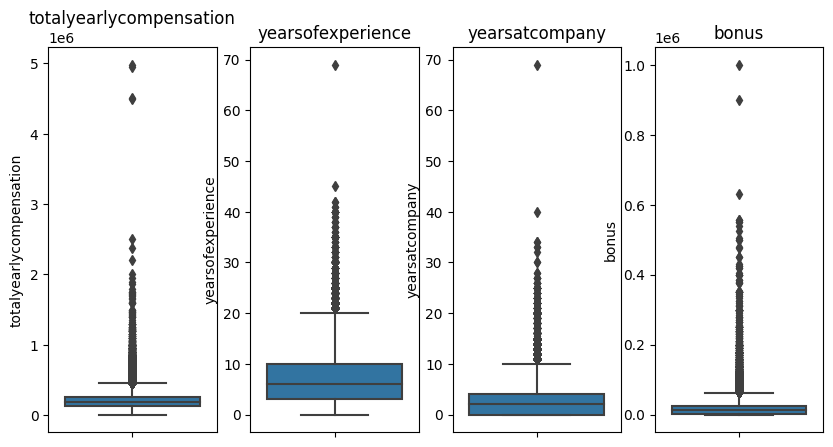

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,5))
fig.subplots_adjust(hspace=.25)

col_num = ['totalyearlycompensation','yearsofexperience','yearsatcompany','bonus']
for i, col in enumerate(col_num):
  bplt = sns.boxplot(y=col, data=df, ax=ax[i])
  ax[i].set_title(col)

*Observación: Según los datos hay sujetos que han trabajado 69 años en la compania los cuales nos daria una edad aproximada de 90 años de edad considerando que empezaron atrabajar a los 20 años, por lo que investigaremos más al respecto*

In [128]:
# Cantidad de sujetos con más de 10 años de trabajo en la empresa
yearsatcopany_df=df[df['yearsatcompany']>=10]
yearsatcopany_df['yearsatcompany'].value_counts().sort_index(ascending=False)

yearsatcompany
69.0      1
40.0      1
34.0      2
33.0      2
32.0      1
30.0      2
28.0      2
27.0      5
26.0      6
25.0     23
24.0     12
23.0     20
22.0     25
21.0     30
20.0    168
19.0     52
18.0     60
17.0     54
16.0     98
15.5      1
15.0    329
14.0    206
13.0    237
12.0    374
11.0    293
10.0    936
Name: count, dtype: int64

In [129]:
df[df['yearsatcompany']>=40]

,year,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,bonus,gender,Race,Education,city,country,es_faang
46988,2021,Disney,5,Product Designer,102000,69.0,69.0,0.0,Desconocido,Desconocido,Desconocido,Crapo,United States,0
51436,2021,Lockheed Martin,E5,Software Engineer,166000,40.0,40.0,8000.0,Male,White,Master's Degree,Littleton,United States,0


*Observación: A juzgar por la compania y el rol desempeñado por la persona con 69 años de trabajo en la misma creo que es perfectamente posible, por lo que no eliminaremos este dato y damos por terminado el ETL de los datos*

In [130]:
df.to_csv("salario_data_cleaned.csv", index=True)